In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib


In [5]:
data = pd.read_csv(r"C:\Users\palpr\Downloads\MLprojectdata.csv")

# Assign column names if not already present
data.columns = [
    "ID", "ProductID", "UserID", "ProfileName", 
    "HelpfulnessNumerator", "HelpfulnessDenominator", 
    "Score", "Summary", "Text"
]


In [7]:
def label_sentiment(score):
    if score >= 4:
        return "positive"
    elif score == 3:
        return "neutral"
    else:
        return "negative"

data['Sentiment'] = data['Score'].apply(label_sentiment)


C:\Users\palpr\AppData\Local\Temp\ipykernel_26036\2820755689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sentiment', palette='viridis')


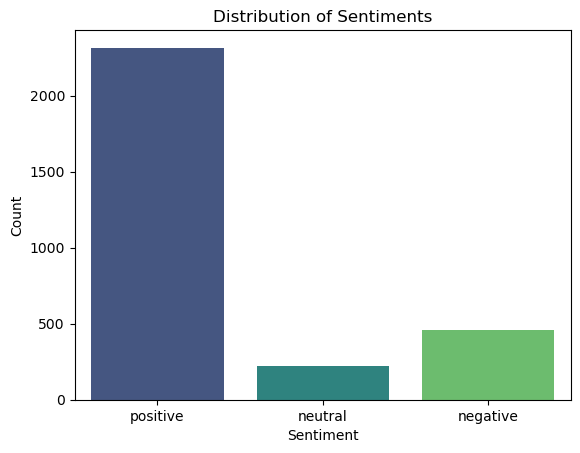

C:\Users\palpr\AppData\Local\Temp\ipykernel_26036\2820755689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Sentiment', y='Score', palette='coolwarm')


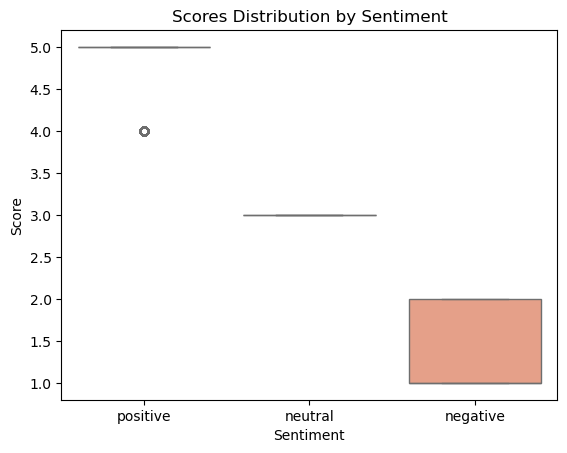

In [9]:
# Sentiment Distribution
sns.countplot(data=data, x='Sentiment', palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Score Distribution by Sentiment
sns.boxplot(data=data, x='Sentiment', y='Score', palette='coolwarm')
plt.title('Scores Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()


In [11]:
# Use only required columns and drop missing data
processed_data = data[['Text', 'Sentiment']].dropna()


In [13]:
X = processed_data['Text']
y = processed_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [29]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_tfidf, y_train)



LogisticRegression(class_weight='balanced')

Accuracy: 0.7783333333333333
Classification Report:
               precision    recall  f1-score   support

    negative       0.52      0.64      0.57        85
     neutral       0.21      0.25      0.23        44
    positive       0.90      0.85      0.88       471

    accuracy                           0.78       600
   macro avg       0.55      0.58      0.56       600
weighted avg       0.80      0.78      0.79       600



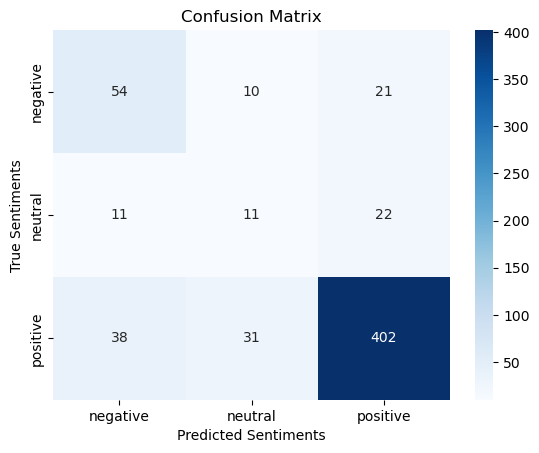

In [31]:
predictions = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('True Sentiments')
plt.show()


In [33]:
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(model, "sentiment_model.pkl")


['sentiment_model.pkl']

In [46]:
example_review = ["""My cats thought this smelled divine, but when they went to eat it, thought it was just so so.  In fact, they left some of the liver bits, which were important, as one of my cats has anemia and the vet wanted him to eat liver."""]
example_tfidf = vectorizer.transform(example_review)
example_prediction = model.predict(example_tfidf)
print("Example Prediction:", example_prediction[0])


Example Prediction: neutral
